In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [93]:
train = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [8]:
categorical_fields = ['Sex', 'Cabin', 'Embarked']

for categorical_field in categorical_fields:
    print '\n', categorical_field, '---------\n', train[categorical_field].unique()


Sex ---------
['male' 'female']

Cabin ---------
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C

In [23]:
train['Sex_Int'] = np.nan
train.loc[train['Sex'] == 'male', 'Sex_Int'] = 0
train.loc[train['Sex'] == 'female', 'Sex_Int'] = 1

#### Distribution Analysis

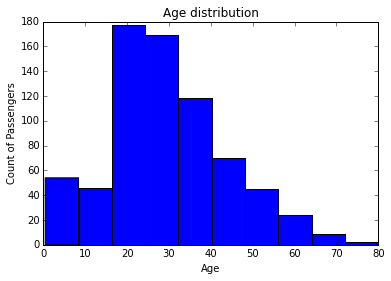

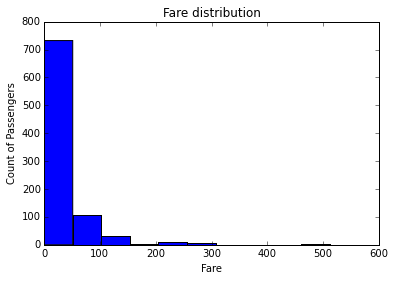

In [9]:
def plot_hist(df, field):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(df[field], bins=10, range=(df[field].min(), df[field].max()))
    hist_title = '{0} distribution'.format(field)
    plt.title(hist_title)
    plt.xlabel(field)
    plt.ylabel('Count of Passengers')
    plt.show()

plot_hist(train, 'Age')
plot_hist(train, 'Fare')

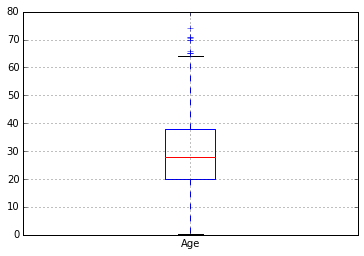

In [10]:
train.boxplot(column='Age', return_type='axes')

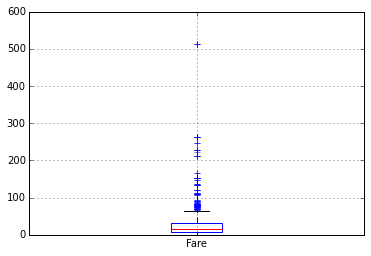

In [11]:
train.boxplot(column='Fare', return_type='axes')

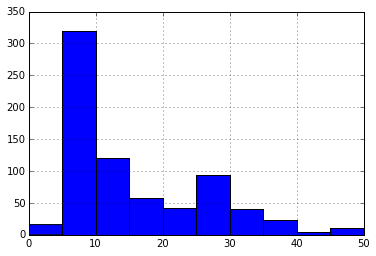

In [45]:
train.Fare.hist(range=(train.Fare.min(), 50))

#### Categorical variable analysis

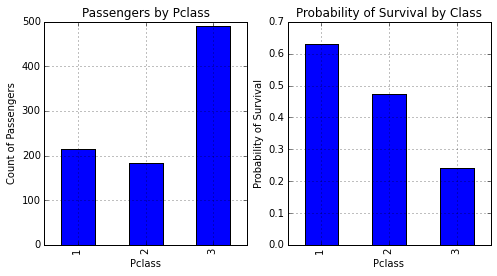

In [12]:
survival_by_pclass = train.groupby('Pclass').Survived
survival_count = survival_by_pclass.count()
survival_rate = survival_by_pclass.sum() / survival_count

pclass_separate_charts = plt.figure(figsize=(8,4))
survival_count_chart = pclass_separate_charts.add_subplot(121)
survival_count_chart.set_xlabel('Pclass')
survival_count_chart.set_ylabel('Count of Passengers')
survival_count_chart.set_title('Passengers by Pclass')
survival_count.plot(kind='bar')

survival_rate_chart = pclass_separate_charts.add_subplot(122)
survival_rate_chart.set_xlabel('Pclass')
survival_rate_chart.set_ylabel('Probability of Survival')
survival_rate_chart.set_title('Probability of Survival by Class')
survival_rate.plot(kind='bar')


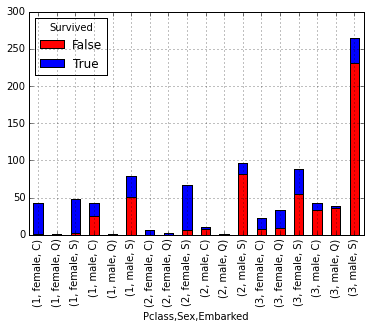

In [107]:
pclass_crosstab = pd.crosstab([train.Pclass, train.Sex, train.Embarked], train.Survived.astype(bool))
pclass_crosstab.plot(kind='bar', stacked=True, color=['red', 'blue'])

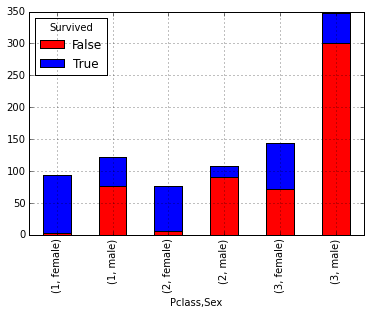

In [36]:
pclass_crosstab = pd.crosstab([train.Pclass, train.Sex], train.Survived.astype(bool))
pclass_crosstab.plot(kind='bar', stacked=True, color=['red', 'blue'])

In [99]:
# Pclass looks like a strong predictor of survival, so let's bucket "Fare", which is a  more granular measurement of 
# income

def add_fare_bucket(dataframe):
    dataframe.FareBucket = np.nan
    
    prev_quantile = 0
    
    for bucket_num, fare_quantile in enumerate(np.arange(.1, 1.1, .1)):
        print bucket_num, fare_quantile
        dataframe.loc[(dataframe.Fare >= dataframe.Fare.quantile(prev_quantile)) &
                      (dataframe.Fare <= dataframe.Fare.quantile(fare_quantile)), 'FareBucket'] = (bucket_num + 1)
        
        prev_quantile = fare_quantile

add_fare_bucket(train)

0 0.1
1 0.2
2 0.3
3 0.4
4 0.5
5 0.6
6 0.7
7 0.8
8 0.9
9 1.0


nan

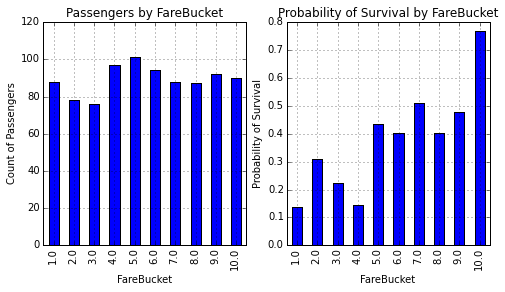

In [104]:
survival_by_fare = train.groupby('FareBucket').Survived
survival_count = survival_by_fare.count()
survival_rate = survival_by_fare.sum() / survival_count

pclass_separate_charts = plt.figure(figsize=(8,4))
survival_count_chart = pclass_separate_charts.add_subplot(121)
survival_count_chart.set_xlabel('FareBucket')
survival_count_chart.set_ylabel('Count of Passengers')
survival_count_chart.set_title('Passengers by FareBucket')
survival_count.plot(kind='bar')

survival_rate_chart = pclass_separate_charts.add_subplot(122)
survival_rate_chart.set_xlabel('FareBucket')
survival_rate_chart.set_ylabel('Probability of Survival')
survival_rate_chart.set_title('Probability of Survival by FareBucket')
survival_rate.plot(kind='bar')


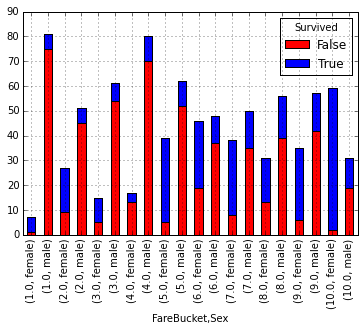

In [105]:
pclass_crosstab = pd.crosstab([train['FareBucket'], train.Sex], train.Survived.astype(bool))
pclass_crosstab.plot(kind='bar', stacked=True, color=['red', 'blue'])

In [116]:
survival_by_sex_and_fare = train.groupby(['FareBucket', 'Sex']).Survived
survival_count = survival_by_sex_and_fare.count()
survival_rate = survival_by_sex_and_fare.sum() / survival_count

survival_rate

FareBucket  Sex   
1           female    0.857143
            male      0.074074
2           female    0.666667
            male      0.117647
3           female    0.666667
            male      0.114754
4           female    0.235294
            male      0.125000
5           female    0.871795
            male      0.161290
6           female    0.586957
            male      0.229167
7           female    0.789474
            male      0.300000
8           female    0.580645
            male      0.303571
9           female    0.828571
            male      0.263158
10          female    0.966102
            male      0.387097
Name: Survived, dtype: float64

In [ ]:
gender_c

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d904f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e1b45d0>]], dtype=object)

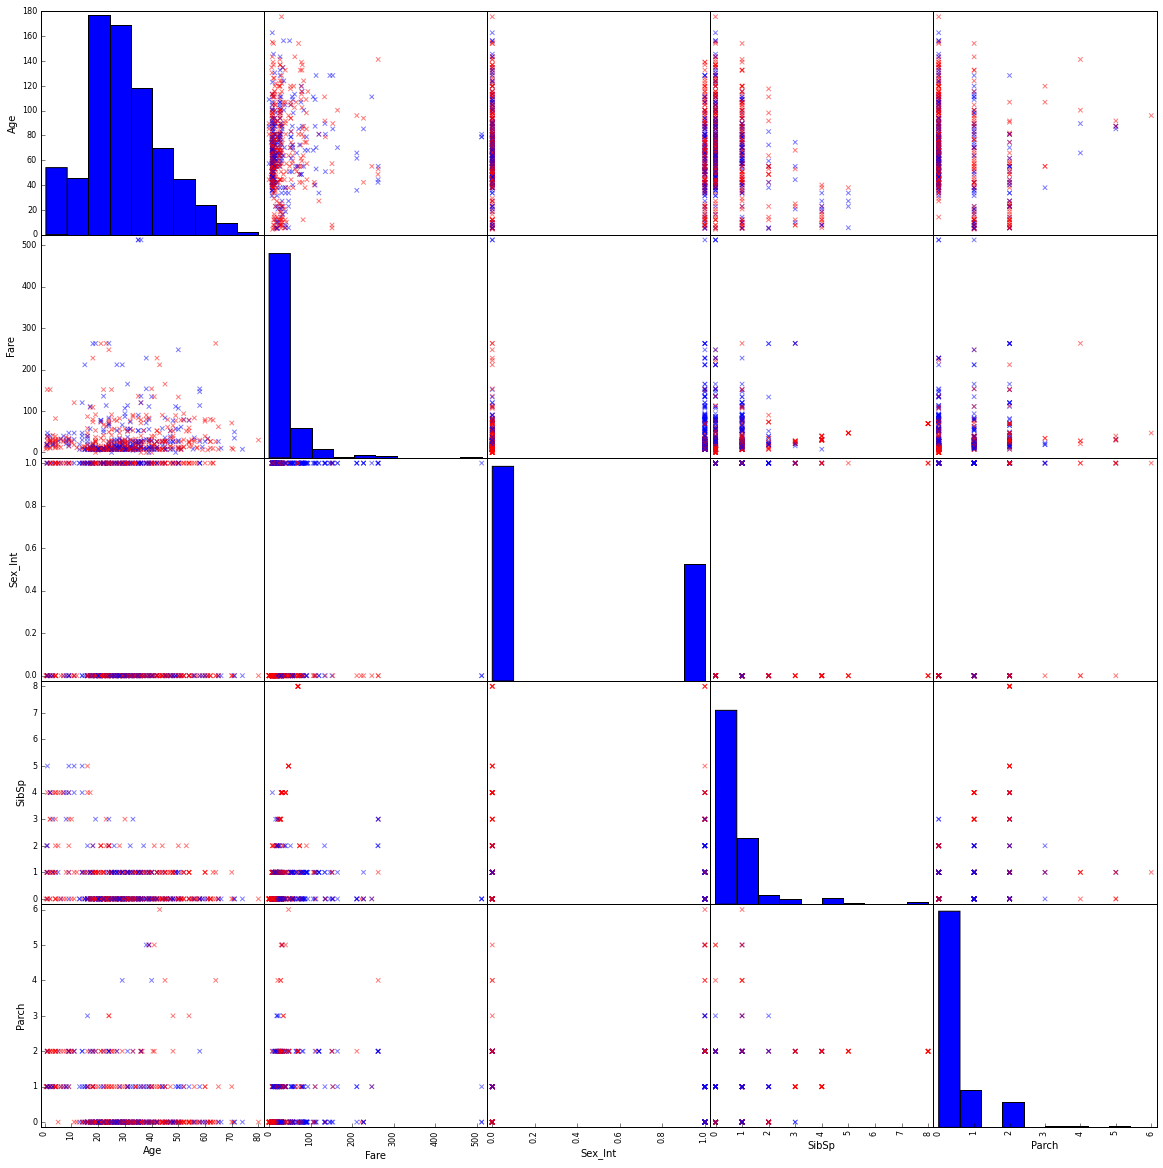

In [34]:
train.columns
colors = ['red', 'blue']
pd.scatter_matrix(train[['Age', 'Fare', 'Sex_Int', 'SibSp', 'Parch']], 
                  figsize=[20, 20], c=train['Survived'].apply(lambda x: colors[x]), marker='x')

## Data Munging

#### Missing Values

In [18]:
# find all missing values
print '-----Missing Values-----'
for col in train.columns:
    missing_values = sum(train[col].isnull())
    
    if missing_values > 0:
        print col, missing_values
        
# drop 'Cabin' because it has a lot of missing values
# sum(train['Cabin'].isnull()) 

# and 'Ticket' because it looks to have mix of numbers and text
# and doesn’t seem to contain any information. 
columns_to_drop = ['Cabin', 'Ticket']

for col in columns_to_drop:
    if col in train.columns:
        train = train.drop(col, axis=1)

-----Missing Values-----
Age 177
Cabin 687
Embarked 2
